**Nombre:**  Jonnathan Astudillo

**Curso:**  M3A

**Paso 1: Importar Bibliotecas**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


**Paso 2: Cargar los Datos**

In [3]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-01-2020.csv'
df = pd.read_csv(url)

**Paso 3: Preprocesamiento de Datos**

In [5]:
# Selección de columnas relevantes
df = df[['Province_State', 'Country_Region', 'Last_Update', 'Confirmed', 'Deaths', 'Recovered', 'Active']]

# Renombrar las columnas para facilidad
df.columns = ['provincia_estado', 'pais_region', 'ultima_actualizacion', 'confirmados', 'muertes', 'recuperados', 'activos']
df.head()

,provincia_estado,pais_region,ultima_actualizacion,confirmados,muertes,recuperados,activos
0,South Carolina,US,2020-04-01 21:58:49,4,0,0,4
1,Louisiana,US,2020-04-01 21:58:49,47,1,0,46
2,Virginia,US,2020-04-01 21:58:49,7,0,0,7
3,Idaho,US,2020-04-01 21:58:49,195,3,0,192
4,Iowa,US,2020-04-01 21:58:49,1,0,0,1


In [6]:
# Verificar valores faltantes
print(df.isnull().sum())

# Rellenar valores faltantes
df.fillna({'provincia_estado': 'Desconocido', 'recuperados': 0, 'activos': 0}, inplace=True)

# Eliminar filas con valores faltantes en 'confirmados' y 'muertes'
df.dropna(subset=['confirmados', 'muertes'], inplace=True)
print(df.isnull().sum())

provincia_estado        184
pais_region               0
ultima_actualizacion      0
confirmados               0
muertes                   0
recuperados               0
activos                   0
dtype: int64
provincia_estado        0
pais_region             0
ultima_actualizacion    0
confirmados             0
muertes                 0
recuperados             0
activos                 0
dtype: int64


<ipython-input-6-1ac139377c31>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna({'provincia_estado': 'Desconocido', 'recuperados': 0, 'activos': 0}, inplace=True)
<ipython-input-6-1ac139377c31>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['confirmados', 'muertes'], inplace=True)


In [7]:
# Convertir columna de última actualización a tipo datetime
df['ultima_actualizacion'] = pd.to_datetime(df['ultima_actualizacion'])
df.dtypes

<ipython-input-7-21ec3619b099>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ultima_actualizacion'] = pd.to_datetime(df['ultima_actualizacion'])


provincia_estado                object
pais_region                     object
ultima_actualizacion    datetime64[ns]
confirmados                      int64
muertes                          int64
recuperados                      int64
activos                          int64
dtype: object

**Paso 4: Análisis y Visualización**

<ipython-input-8-ba53ea7118ca>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


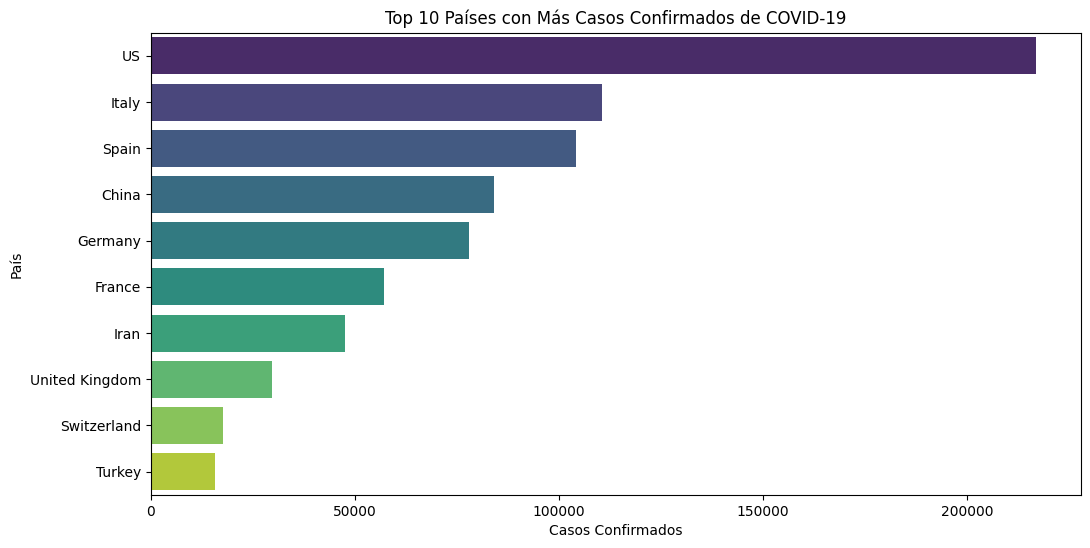

In [8]:
plt.figure(figsize=(12, 6))
top_countries = df.groupby('pais_region')['confirmados'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Top 10 Países con Más Casos Confirmados de COVID-19')
plt.xlabel('Casos Confirmados')
plt.ylabel('País')
plt.show()

**Distribución de Casos por Estado/Provincia**

<ipython-input-9-2b1fd6acf90e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_provinces.values, y=top_provinces.index, palette='coolwarm')


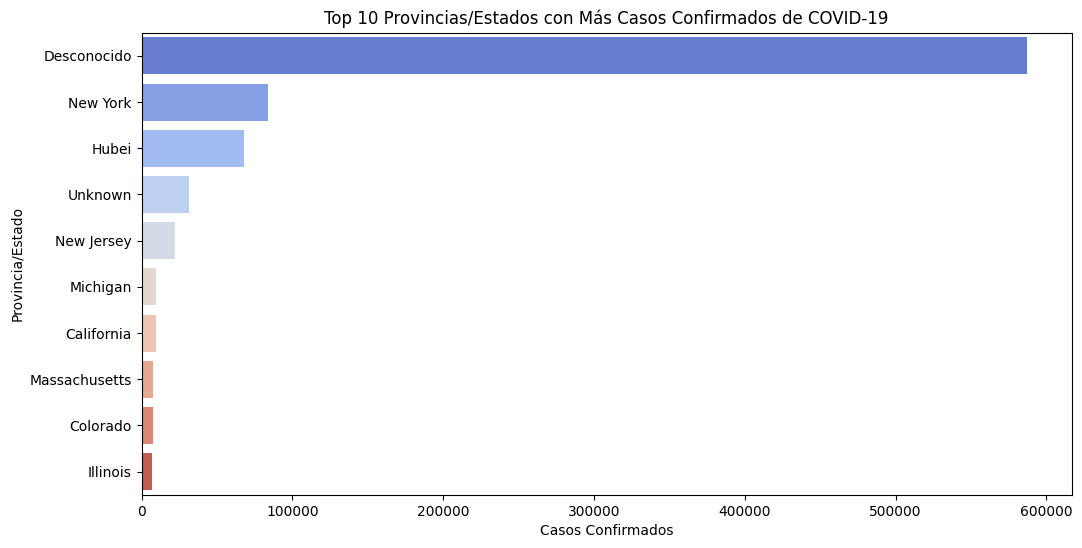

In [9]:
plt.figure(figsize=(12, 6))
top_provinces = df.groupby('provincia_estado')['confirmados'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_provinces.values, y=top_provinces.index, palette='coolwarm')
plt.title('Top 10 Provincias/Estados con Más Casos Confirmados de COVID-19')
plt.xlabel('Casos Confirmados')
plt.ylabel('Provincia/Estado')
plt.show()